In [57]:
# %pip install ipynb
# %pip install import-ipynb

In [5]:
# imports all functions from background_removing
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ipynb.fs.defs.background_removing import *


Order to matching puzzle pieces:
1. Create a class for the puzzle pieces
* class will have a list of 4 edges class
2. Create an edges class
* edges will have what type of edge it is and an array of every pixel that is part of the edge
* it could also have a snippet of where the edge is
* what relative side the edge was taken to the image

In [6]:
class Piece:
    def __init__(self, img = None, edges = None, corners = None):
        self._img = img
        self._edges = edges
        self._corners = corners
    def setImg (self, img):
        self._img = img
    def setEdges(self, edges):
        self._edges = edges
    def setCorners(self, corners):
        self._corners = corners
    def getImg(self):
        return self._img
    def getEdges(self):
        return self._edges
    def getCorners(self):
        return self._corners
class Edge:
    def __init__(self):
        pass

In [7]:
piece_1 = cv2.imread('color_img0.jpg', cv2.IMREAD_GRAYSCALE)
piece_2 = cv2.imread('color_img1.jpg', cv2.IMREAD_GRAYSCALE)

# pieces = [piece_1, piece_2]

# _, thresh = cv2.threshold(piece_1, 240, 255, cv2.THRESH_BINARY_INV)

# # Find contours in the binary image
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Assuming the largest contour corresponds to the puzzle piece
# largest_contour = max(contours, key=cv2.contourArea)

# # Approximate the contour to get the four corners
# epsilon = 0.02 * cv2.arcLength(largest_contour, True)
# corners = cv2.approxPolyDP(largest_contour, epsilon, True)

# # Convert the corners to a format suitable for cv2.goodFeaturesToTrack
# corners_for_tracking = corners.reshape(-1, 2).astype(np.float32)

# # Use cv2.goodFeaturesToTrack to find corners in the puzzle piece
# corners = cv2.goodFeaturesToTrack(piece_1, maxCorners=4, qualityLevel=0.01, minDistance=10)

# # Convert the corners back to integers
# corners = np.int0(corners)

# # Draw dots at each corner
# for corner in corners:
#     x, y = corner.ravel()
#     cv2.circle(piece_1, (x, y), 5, (255, 255, 255), -1)  # -1 fills the circle

# plt.imshow(piece_1, cmap='gray')
# plt.show()


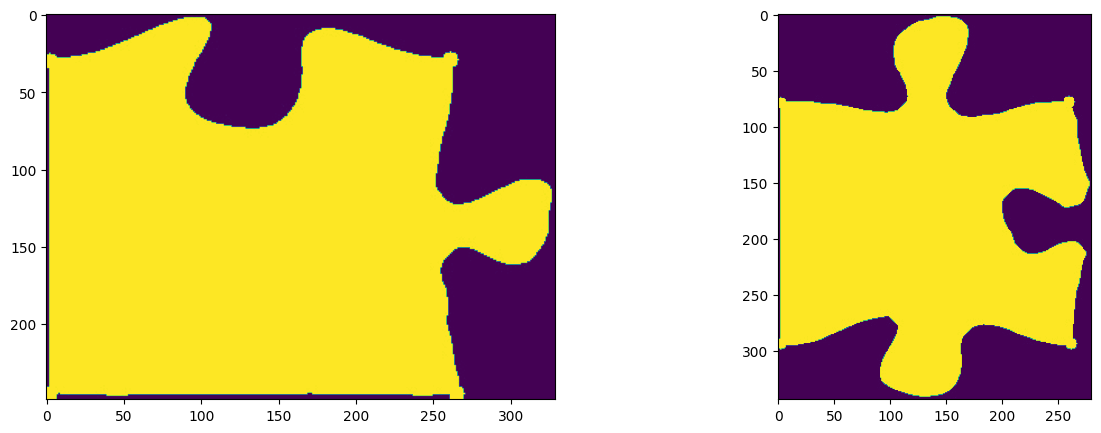

In [9]:
corner_pixel_1 = [(2, 30), (261, 29),
                  (2, 245), (265, 245)]

corner_pixel_2 = [(2, 79), (259, 78),
                  (2, 294), (261, 294)]

piece1_cpy = np.copy(piece_1)
piece2_cpy = np.copy(piece_2)
# Draw dots at each corner
for corner in corner_pixel_1:
    x, y = corner
    cv2.circle(piece1_cpy, (x, y), 5, (255, 255, 255), -1)  # -1 fills the circle

# Draw dots at each corner
for corner in corner_pixel_2:
    x, y = corner
    cv2.circle(piece2_cpy, (x, y), 5, (255, 255, 255), -1)  # -1 fills the circle

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].imshow(piece1_cpy)
axes[1].imshow(piece2_cpy)
plt.show()

p1 = Piece(piece_1, None, corner_pixel_1)
p2 = Piece(piece_2, None, corner_pixel_2)


In [23]:
new_piece = np.vstack((piece_1, piece_2))
plt.imshow(new_piece, cmap='gray')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 329 and the array at index 1 has size 280